### This example shows how to plot 3D histograms

In [1]:
import sys
sys.dont_write_bytecode = True
sys.path.append('../')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import plot_utils as pu

In [4]:
%matplotlib inline

### Most simple example

Generate four sets of data from four different normal distributions, and plot histograms.

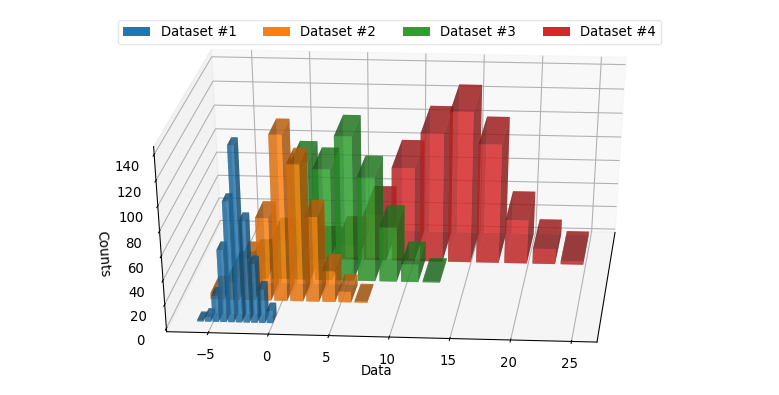

In [5]:
X = [[None]] * 4
X[0] = np.random.normal(-3, 1, 500)
X[1] = np.random.normal(0, 2, 480)
X[2] = np.random.normal(3, 3, 510)
X[3] = np.random.normal(12, 4, 520)
pu.histogram3d(X);  # plot histograms with all other arguments by default

**Note:** The default transparency (`alpha`) of bars are set to 0.6. However, there is an outstanding bug in Matplotlib with Python 3.6, which makes transparency setting useless (see this post for bug fix progress: https://github.com/matplotlib/matplotlib/issues/9559). This bug does not exist in Python 2.7.

### Real-world example using the iris dataset

In [6]:
iris = pd.read_csv('./datasets/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris_names = list(np.unique(iris['species']))
iris_names

['setosa', 'versicolor', 'virginica']

Collect sepal length and width data for each type of iris:

In [8]:
X = []
Y = []
for name in iris_names:
    X.append(np.array(iris['sepal_length'].loc[iris['species']==name]))
    Y.append(np.array(iris['sepal_width'].loc[iris['species']==name]))

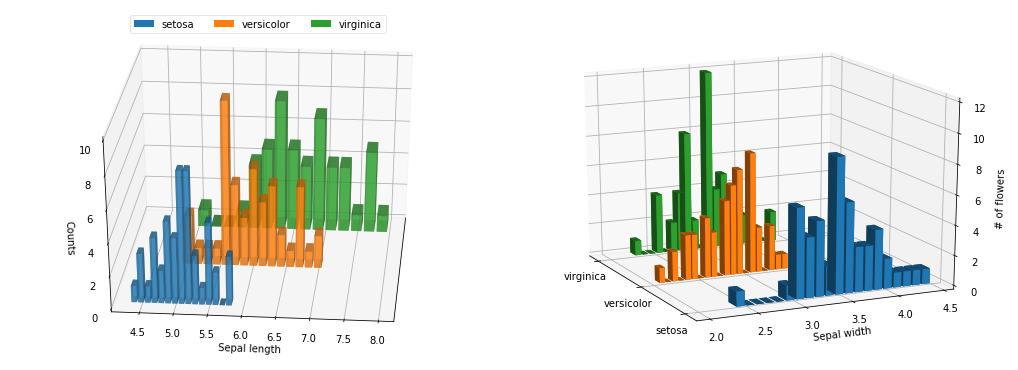

In [9]:
fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(121,projection='3d')  # projection='3d' is mandatory
ax2 = fig.add_subplot(122,projection='3d')

# ---------  Plot two sets of histograms on two subplots, respectively  -------------
pu.histogram3d(X, bins=15, fig=fig, ax=ax1, data_labels=iris_names,
               plot_xlabel=False, dx_factor=1.6, ylabel='Sepal length');
pu.histogram3d(Y, bins=20, fig=fig, ax=ax2, data_labels=iris_names,
               dx_factor=1.6,
               azim=-25, elev=18, alpha=1.0,     # adjust angle of view and transparency
               ylabel='Sepal width', zlabel='# of flowers',  # change z label
               plot_legend=False, plot_xlabel=True);  # disable the legend, and show x label instead

plt.tight_layout(pad=0.2, h_pad=0.2)